In [1]:
import numpy as np
from minirocket_utils import *

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import struct
import os

import numpy as np
import os
import warnings
import random
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
import pywt

from data_split import *
from data_process import *

In [3]:
j11_dig_10 = get_specific_data('E:/研一/嗑盐/土壤扰动/dataset/j11', by_txt=False)
zwy_dig_10 = get_specific_data('E:/研一/嗑盐/土壤扰动/dataset/zwy', by_txt=False)

In [55]:
rocket = MiniRocketImage(num_features=20000, max_dilations_per_kernel=32)

In [5]:
zwy_dig_10_z = np.array([item['data_z'] for item in zwy_dig_10]).reshape(-1,1,96)
# j11_dig_10_z = np.array([item['data_z'] for item in j11_dig_10]).reshape(-1,1,96)

In [8]:
_, y1 = rocket.fit_transform(zwy_dig_10_z)
_, y2 = rocket.fit_transform(j11_dig_10_z)

In [11]:
np.sum(y1[0] == y2[0])

9747

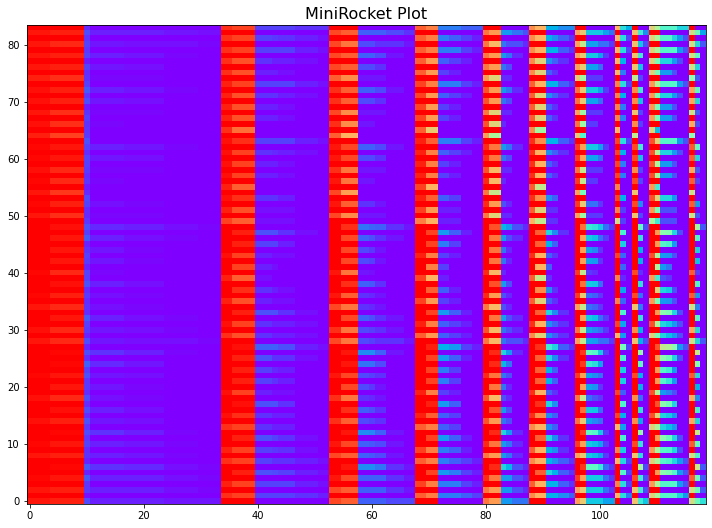

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(y1[0], cmap='rainbow', origin='lower')
plt.title('MiniRocket Plot', fontsize=16)
plt.tight_layout()
plt.show()

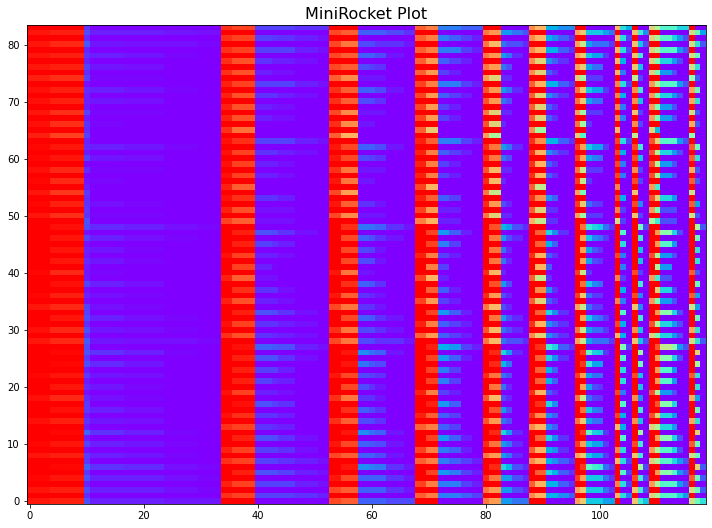

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(y2[0], cmap='rainbow', origin='lower')
plt.title('MiniRocket Plot', fontsize=16)
plt.tight_layout()
plt.show()

In [56]:
zwy_dig_10 = get_specific_data('E:/研一/嗑盐/土壤扰动/dataset/zwy', by_txt=False)
zwy_jump_10 = get_specific_data('E:/研一/嗑盐/土壤扰动/dataset/zwy', activity='jump', by_txt=False)
zwy_walk_10 = get_specific_data('E:/研一/嗑盐/土壤扰动/dataset/zwy', activity='walk', by_txt=False)

total_data = zwy_dig_10 + zwy_jump_10 + zwy_walk_10
random.shuffle(total_data)
train_data = total_data[:int(0.8 * len(total_data))]
test_data = total_data[int(0.8 * len(total_data)):]

train_set = np.array([item['data_z'] for item in train_data]).reshape(-1,1,96)
train_label = np.array([item['label'] for item in train_data]).reshape(-1,1)

test_set = np.array([item['data_z'] for item in test_data]).reshape(-1,1,96)
test_label = np.array([item['label'] for item in test_data]).reshape(-1,1)

In [61]:
train_set_t, _ = rocket.fit_transform(train_set)

In [62]:
from sklearn.linear_model import RidgeClassifierCV

In [63]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(train_set_t, train_label)

D:\Software\Anaconda3\envs\torch\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [64]:
print(clf.score(train_set_t, train_label))
print(clf.score(rocket.transform(test_set)[0], test_label))

0.9603960396039604
0.7307692307692307


In [32]:
from sktime.transformations.panel.rocket import MiniRocket

In [65]:
skt_rocket = MiniRocket(num_features=20000)
train_set_t2 = skt_rocket.fit_transform(train_set)

In [66]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(train_set_t2, train_label)

D:\Software\Anaconda3\envs\torch\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [67]:
clf.score(train_set_t2, train_label)

1.0

In [68]:
clf.score(skt_rocket.transform(test_set), test_label)

0.8076923076923077